# ESTRUCTURA DE DATOS

## Implementación y Análisis de Complejidad Conjuntos Disyuntos y Hash Tables

**Jared Mijail Ramírez Escalante**  
**[jramirezes@unal.edu.co](mailto:jramirezes@unal.edu.co)**


---

### Introduccion

**Objetivo:**  Implementar la estructura de datos Conjuntos Disyuntos y Tablas Hash realizando un análisis de
complejidad de los métodos asociados. Se espera que se mida el tiempo de ejecución de cada
método, se visualice los resultados y se presenten conclusiones basadas en el análisis.

___


**Metodología**

Para este taller se escribirán las estructuras de datos en Python, las cuales se importarán posteriormente para ser evaluadas. Adicionalmente, se desarrollarán implementaciones en Zig y C++; sin embargo, solo se evaluarán las estructuras en Python y la hash table implementada en C++, tal como se hizo en el taller número 1.

Para medir los tiempos de ejecución de cada estructura se crearán dos funciones:

1. **Función de evaluación múltiple:** Esta función recibirá una función de evaluación y un entero denominado "num_random_experiments". Su tarea será ejecutar la evaluación en un rango especificado por otro entero ("range") durante múltiples experimentos aleatorios. Los resultados de estos experimentos se promediarán para obtener mediciones lo más estables posibles.

2. **Funciones de evaluación específicas:** Se escribirán varias funciones de evaluación en Python utilizando la biblioteca estándar de tiempo. Estas funciones se adaptarán según sea necesario; por ejemplo, si una función requiere borrar datos de la estructura, podrá hacerlo sin que este tiempo se incluya en la medición, como se ha realizado en talleres previos.

Finalmente, los datos obtenidos se graficarán utilizando la biblioteca Matplotlib para facilitar su análisis.

___





### Marco Teorico

En esta seccion exploraremos la estructura de datos conjuntos disyuntos y Hash Tables complementando la informacion aprendida en clase.

#### Conjuntos disyuntos

Este es un tipo de estrucura especial pues no te permite guardar cualquier tipo de dato, como si permiten las otras estructuras que hemos visto, esta estrctura crea un numero n de conjuntos, esto atraves de una lista, puede ser implementado, en el que cada espacio de la lista representa un elemento que tambien es un conjunto, ahora el numero que tiene este espacio representa a que conjunto pertenece este elemento, y con esto ya esta todo lo necesario.

Cabe resaltar que es su representacion se ve como un arbol al revez, o podria ser como desde las ramas al tronco. La siguiente imagen permite visualizarlo mejor.

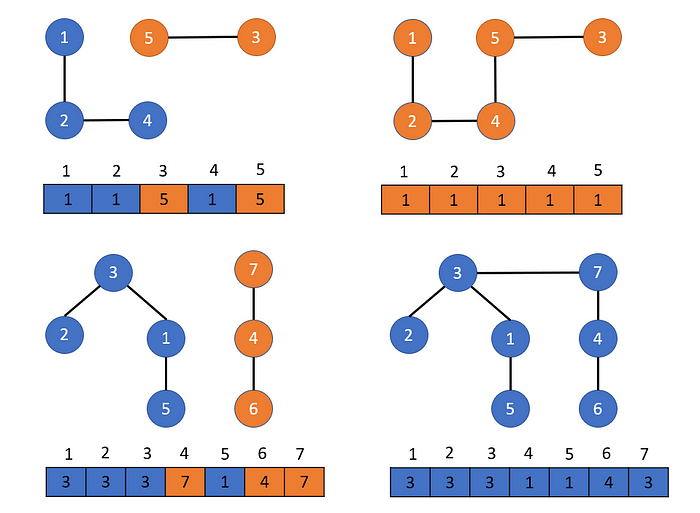


Las operaciones que este tiene son:

- **MakeSet:** Crea un conjunto único para cada elemento, de modo que inicialmente cada elemento es el representante de su propio conjunto.
- **Find:** Determina a qué conjunto pertenece un elemento, devolviendo el representante (o raíz) del conjunto. Esta operación es fundamental para comprobar si dos elementos están en el mismo conjunto.
- **Union:** Une dos conjuntos disyuntos en uno solo. Generalmente, se realiza combinando los árboles que representan cada conjunto.

Optimización

Para que las operaciones sean muy eficientes, se emplean dos técnicas clave:
- **Union por rango (o por tamaño):** Al unir dos conjuntos, se hace que el árbol más pequeño se cuelgue del árbol más grande. Esto ayuda a evitar que los árboles se vuelvan demasiado altos.
- **Compresión de caminos:** Durante la operación de "find", se actualiza la estructura del árbol haciendo que cada nodo visitado apunte directamente al representante del conjunto. Esto reduce significativamente la profundidad de los árboles y, por ende, mejora la eficiencia de futuras operaciones.

Gracias a estas optimizaciones, las operaciones "find" y "union" tienen un tiempo amortizado casi constante, concretamente O(α(n)), donde α es la inversa de la función de Ackermann, una función que crece extremadamente despacio.


#### Hash Table

Una tabla hash es una estructura de datos que almacena la informacion en pares clave-valor, lo que tambien se conoce en python como un diccionario, esta estructura esta implementada bajo un arreglo estandar, y un funcion hash. Esta estructura suele tener tiempos de insercion, eliminacion y busqueda en promedio de O(1), en el peor de los casos puede ser de O(n), y esta estructura no guarda orden.

**Funcion Hash:**  La funcion Hash es lo que le da su velocidad, esta es cualquier funcion sobreyectiva, mas no inyectiva, que es determinista, osea siempre devuelve el mismo valor, de forma que a una n cantidad de elementos, le puedes asignar e indices, atraves de la funcion Hash, cuando a un elemento se le asigna un mismo e que a otro n, entonces ocurre una colision.

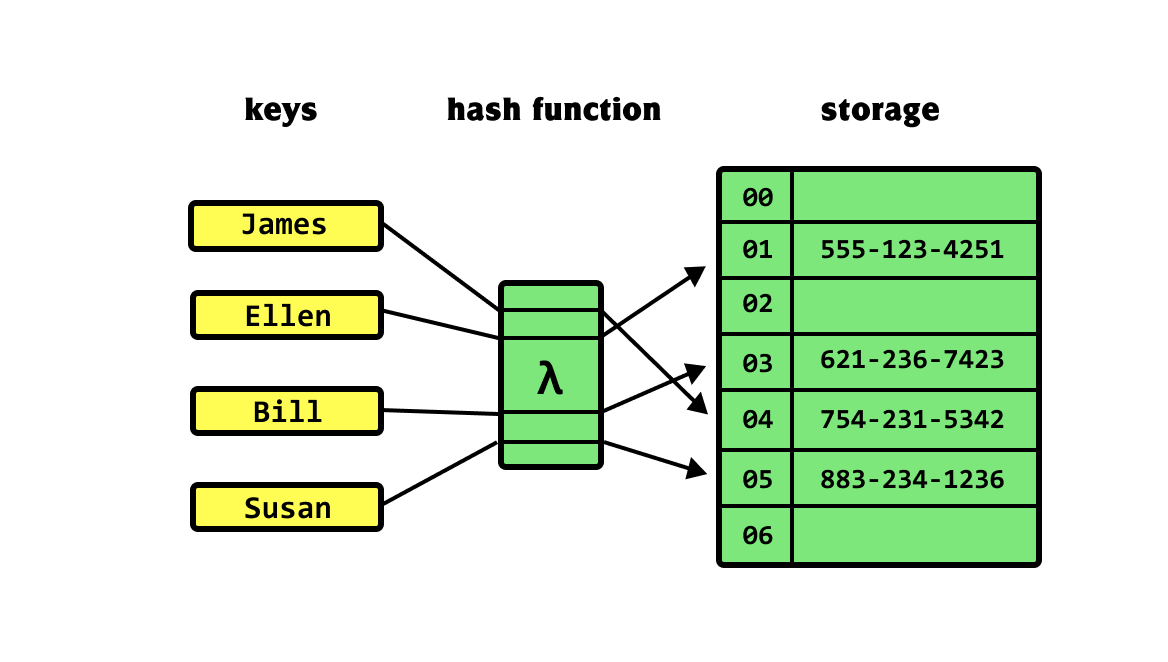

**Colisiones:** Una colision como se dijo sucede cuando a dos elementos distintos se les asigna un mismo idice o identificador, esto se puede resolver con *Chaining* o *Direccion Abierta*, en la direccion abierta simplemente se busca un espacio disponible en la tablam con algun esquema de sondeo, en el chaining cada espacio de la tabla es una lista de forma que añades el valor que colisiono en la lista del codigo Hash que se le asigno. Como ilustra la siguiente imagen.

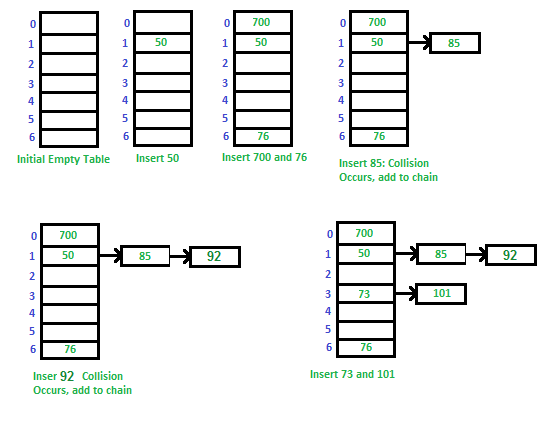

Otro metodo para evitar colisiones es el **DobleHashing**, que utiliza una segunda funcion Hash encaso de haber colisiones, asignandote un nuevo indice en caso de tener ocupado en el que estas, implica calculos adicionales pero tambien reduce la memoria que implica usar una lista de listas.

otro aspecto de estas estrucuras es elijir el tamaño de la tabla adecaudamente, pues mientras mayor sea la tabla mayor sera la memoria utilizada pero tambien se reduce la probabilidad de colisiones y por tanto se mejora la velocidad de la misma. 

___
### Implementaciones

A Continuación podremos ver las implementaciones de las estructuras previamente enunciadas, junto a un análisis de las mismas.


#### Conjunto Disyunto

Para esta estructura tendremos los métodos find, union, connected. Que son las funciones esenciales de esta estructura.

##### Constructor

In [ ]:
class UnionFind:
    def __init__(self, n):
        # Inicializa n conjuntos; cada elemento es su propio representante
        self.parent = [i for i in range(n)]
        self.rank = [0] * n  # Rango para la unión por tamaño

Para el constructor de nuestra calse Union Find (otro nombre conocido para conjuntos disyuntos), vamos a solicitar primero un n, que va a se el numero de elementos que va a tener nuestra estructura, ahora tambien tenemos una variable rank que va a ser importante a la hora de hacer una union

##### Find

In [ ]:
def find(self, x):
    # Retorna el representante del conjunto al que pertenece x
    if self.parent[x] != x:
        # Compresión de caminos: actualiza el padre de x para apuntar al representante
        self.parent[x] = self.find(self.parent[x])
    return self.parent[x]

Con este metodo podemos saber a que grupo pertenece cierto elemento, para ello, tenemos una funcion recursiva, con eseta funcion no solo buscamos el cojunto sino que tambien actualizamos las referencias al padre, lo que hace la funcion es revisar si el elemento que tiene cierto indice es el mismo indice, si no lo es, entonces debe tener una referencia al padre, por lo que volveremos a correr la funcion pero actualizaremos la referencia del nodo que es la raiz.

##### Union

In [ ]:
def union(self, x, y):
    # Une los conjuntos que contienen x e y
    rootX = self.find(x)
    rootY = self.find(y)
    if rootX == rootY:
        return  # Ya están unidos

    # Unión por rango: el árbol de menor rango se cuelga del de mayor rango
    if self.rank[rootX] < self.rank[rootY]:
        self.parent[rootX] = rootY
    elif self.rank[rootX] > self.rank[rootY]:
        self.parent[rootY] = rootX
    else:
        self.parent[rootY] = rootX
        self.rank[rootX] += 1

En la función union lo que hacemos es unir dos conjuntos disyuntos, actualizando la raíz de uno de ellos para que se convierta en hijo de la otra raíz. Primero, usamos la función find para obtener las raíces de los dos elementos. Si ambos elementos ya tienen la misma raíz, significa que pertenecen al mismo conjunto y no es necesario hacer nada.

Si las raíces son distintas, procedemos a unir los conjuntos utilizando la unión por rangos (o alturas). Para ello, contamos con una lista llamada rank (inicializada en cero para todos los conjuntos) que almacena la altura de cada árbol. Se evalúan tres casos:

- **Si el rango de rootX es menor que el de rootY:** Se hace que la raíz de rootX apunte a rootY.
- **Si el rango de rootX es mayor que el de rootY:** Se hace que la raíz de rootY apunte a rootX.
- **Si ambos rangos son iguales:** Se elige arbitrariamente uno de ellos (en este ejemplo, se hace que rootY sea hijo de rootX) y, al unir dos árboles de igual altura, la altura del árbol resultante aumenta en uno. Por ello, se incrementa el rango de rootX en 1.

De esta manera, se mantiene la estructura balanceada, lo que optimiza el tiempo de las futuras operaciones find y union.

##### Connected

In [ ]:
def connected(self, x, y):
    # Retorna True si x e y están en el mismo conjunto
    return self.find(x) == self.find(y)

Con esta funcion simplemente sabemos si dos elementos pertenecen al mismo conjunto, ralizando un find y comparando el grupo al que pertenecen.

#### Hash Table

Ahora implementaremos una Hash Table la implementaremos en python, c++ y zig, con los metodos insert, find, delete y update, hiremos metodo por metodo comparando como se escriben en los distintos lenguajes.

##### Constructor

En general en el constructor definiremos el tamañó de nuestra tabla Hash 

In [ ]:
class HashTable:
    def __init__(self, size: int, hash_function: object = None):
        """
        Constructor de la clase HashTable usando encadenamiento.
        
        :param size: Tamaño de la tabla hash.
        :param hash_function: Función hash personalizada; si no se proporciona, se usa hash(key) % size.
        """
        self.size = size
        self.table = [[] for _ in range(size)]  # Cada casilla es una lista vacía.
        self.hash_function = hash_function if hash_function is not None else (lambda key: hash(key) % size)


En python crearemos una funcion que recibira un entero size que determinara el tamañó de la tabla Hash, y despues recibiremos la funcion hash, este es un valor opcional, por defecto utilizaremos una funcion hash predeterminada de python al cual le aplicaremos el modulo. Con un buble for crearemos n listas dentro de la lista con n espacios. Y ademas tendremos la variable size.

In [ ]:
#include <vector>
#include <functional>
#include <stdexcept>
#include <optional>

template<typename Key, typename Value>
class HashTable {
private:
    size_t size;
    std::vector<std::vector<std::pair<Key, Value>>> table;

    size_t hash_function(const Key& key) const {
        return std::hash<Key>{}(key) % size;
    }

public:
    HashTable(size_t size) : size(size), table(size) {
        if (size == 0) {
            throw std::invalid_argument("Size must be greater than 0");
        }
    }

En C++ no usaremos una función personalizada de hash solo usaremos el módulo de forma predeterminada como la función, en este caso definiremos de forma privada la función hash, la variable size que será de tipo **t_size**, un tipo de variable sin signo utilizada para conteos y la tabla que en este caso se define distinto, definimos una variable table que consiste en un array (vector de la librería estándar), de tipo array, que a su ves es del tipo pair de la librería estándar, con una llave valor, osea un array con arrays de parejas std::vector<std::vector<std::pair<Key, Value>>>


Respecto a la función hash utilizamos la función de la librería estándar de C++ que restringimos al tamaño que definimos utilizando el módulo.

Ahora de forma pública definimos nuestro constructor que tiene el mismo nombre de nuestra clase, este recibirá el argumento size y después utiliza estos valores para inicializar size y table las variables privadas definidas previamente


In [ ]:
const std = @import("std");

pub fn HashTable(comptime Key: type, comptime Value: type) type {
    return struct {
        const Self = @This();

        allocator: std.mem.Allocator,
        size: usize,
        buckets: std.ArrayList(std.ArrayList(Entry)),

        const Entry = struct {
            key: Key,
            value: Value,
        };

        pub fn init(allocator: std.mem.Allocator, size: usize) !Self {
            if (size == 0) return error.InvalidSize;

            var buckets = std.ArrayList(std.ArrayList(Entry)).init(allocator);
            errdefer buckets.deinit();

            for (0..size) |_| {
                try buckets.append(std.ArrayList(Entry).init(allocator));
            }

            return Self{
                .allocator = allocator,
                .size = size,
                .buckets = buckets,
            };
        }

        pub fn deinit(self: *Self) void {
            for (self.buckets.items) |*bucket| {
                bucket.deinit();
            }
            self.buckets.deinit();
        }
        fn getIndex(self: Self, key: Key) usize {
            const hash_u64 = std.hash.autoHash(key);
            return @as(usize, @intCast(hash_u64 % self.size));
        }


Primero importamos la librería estándar, después definiremos los tipos genéricos de nuestra función que son key y value, se recibirán los tipos de estas variables, en tiempo de compilación, y retornaremos una estructura.


Ahora definimos la estructura interna con el const Self = @This();, parecido al self de python pero que no se utiliza automáticamente.


Ahora definimos un allocator, que maneja la memoria de manera dinámica, una variable size de tipo usize y un bucket, de tipo lista de la librería estándar a su vez es de tipo lista de tipo entry, osea una lista de listas, definimos la estructura entry que contiene una llave y un valor, de forma muy similar a como se hizo en C++.


Ahora si definimos nuestro constructor, que recibira el parametro size, pero también el memory allocator, porque a diferencia de C no se asigna memoria de forma automática, detallaremos mas sobre esto al final. Después inicializamos una variable bucket con el tamaño deseado del mismo tipo que definimos esta variable y lo hacemos con el alocador de memoria, además definimos un errdefer en caso de errores, después con un for inicializamos las listas vacías dentro de nuestra lista principal. Después devolvemos el self, con los valores que ya inicializamos.


Finalmente necesitamos crear una función deinit que libere memoria. Y nuestra funcion Hash que funcionara igual a los otros lenguajes.

##### Insert

Ahora definiremos la funcion insert, que recibira una llave valor, hasheare la llave y a el resultado se le asignara el valor.

In [ ]:
    def insert(self, key, value):
        """
        Inserta el par (clave, valor) en la tabla.
        Si la clave ya existe, se actualiza el valor.
        """
        index = self.hash_function(key)
        for i, (k, v) in enumerate(self.table[index]):
            if k == key:
                self.table[index][i] = (key, value)
                return
        self.table[index].append((key, value))

Con esta función pasamos la llave por la función Hash, después obtenemos el índice que buscamos, ya en la lista de ese  índice recorremos la lista, si encontramos que ya existe esta llave con un valor actualizamos su valor, sino simplemente insertamos la llave valor a la lista.

In [ ]:
    void insert(const Key& key, const Value& value) {
        size_t index = hash_function(key);
        auto& bucket = table[index];
        for (auto& pair : bucket) {
            if (pair.first == key) {
                pair.second = value;
                return;
            }
        }
        bucket.emplace_back(key, value);
    }

Para C++ tenemos una estructura muy similar con la diferencia que obtenemos la lista en el bucket que es una **referencia** de nuestra lista de pares original. Más detalles de esto al final, después recorremos nuestra lista con un for, que referencia las parejas en otra referencia de nombre pair, el resto se puede entender de la misma manera que en python.

In [ ]:
        pub fn insert(self: *Self, key: Key, value: Value) !void {
            const index = self.getIndex(key);
            const bucket = &self.buckets.items[index]; 

            for (bucket.items) |*entry| {
                if (entry.key == key) {
                    entry.value = value;
                    return;
                }
            }

            try bucket.append(.{ .key = key, .value = value });
        }

En nuestro código en Zig tenemos casi una equivalencia total con C++, solo con diferencia sintácticas.

##### Search
La funcion search no necesita de mucha explicacion pues de cierta forma esta implicita en nuestro metodo insert que de igual forma tiene que buscar la llave que se dio.

In [ ]:
    def search(self, key):
        """
        Busca la clave y retorna su valor asociado; si no existe, retorna None.
        """
        index = self.hash_function(key)
        for k, v in self.table[index]:
            if k == key:
                return v
        return None

In [ ]:
    std::optional<Value> search(const Key& key) const {
        size_t index = hash_function(key);
        const auto& bucket = table[index];
        for (const auto& pair : bucket) {
            if (pair.first == key) {
                return pair.second;
            }
        }
        return std::nullopt;
    }

In [ ]:
        pub fn search(self: Self, key: Key) ?Value {
            const index = self.getIndex(key);
            const bucket = &self.buckets.items[index];

            for (bucket.items) |entry| {
                if (entry.key == key) {
                    return entry.value;
                }
            }

            return null;
        }

Aca tambien no vemos mayor diferencia entre los lenguajes fuera de los ya mencionados y las diferencias sintácticas de es  los mismos.

##### Delete

In [ ]:
    def delete(self, key):
        """
        Elimina el par (clave, valor) de la tabla.
        Retorna el valor eliminado o None si la clave no existe.
        """
        index = self.hash_function(key)
        for i, (k, v) in enumerate(self.table[index]):
            if k == key:
                del self.table[index][i]
                return v
        return None

In [ ]:
    std::optional<Value> delete(const Key& key) {
        size_t index = hash_function(key);
        auto& bucket = table[index];
        for (auto it = bucket.begin(); it != bucket.end(); ++it) {
            if (it->first == key) {
                Value removed_value = it->second;
                bucket.erase(it);
                return removed_value;
            }
        }
        return std::nullopt;
    }

In [ ]:
        pub fn delete(self: *Self, key: Key) ?Value {
            const index = self.getIndex(key);
            const bucket = &self.buckets.items[index];

            for (bucket.items, 0..) |entry, i| {
                if (entry.key == key) {
                    const removed_value = entry.value;
                    _ = bucket.swapRemove(i);
                    return removed_value;
                }
            }

            return null;
        }

##### Update

Aca tambien el algoritmo es muy parecido a los que ya hemos visto, dado una llave la hasheamos para obtener el índice, y después en un bucle buscamos la llave en ese índice, aunque en retrospectiva el insert ya es en sí mismo el update por tanto esta función es algo innecesaria.

In [ ]:
    def update(self, key, value):
        """
        Actualiza el valor asociado a la clave.
        Lanza KeyError si la clave no se encuentra.
        """
        index = self.hash_function(key)
        for i, (k, _) in enumerate(self.table[index]):
            if k == key:
                self.table[index][i] = (key, value)
                return
        raise KeyError("Clave no encontrada")

In [ ]:
    void update(const Key& key, const Value& value) {
        size_t index = hash_function(key);
        auto& bucket = table[index];
        for (auto& pair : bucket) {
            if (pair.first == key) {
                pair.second = value;
                return;
            }
        }
        throw std::out_of_range("Key not found");
    }

In [ ]:
        pub fn update(self: *Self, key: Key, value: Value) !void {
            const index = self.getIndex(key);
            const bucket = &self.buckets.items[index];

            for (bucket.items) |*entry| {
                if (entry.key == key) {
                    entry.value = value;
                    return;
                }
            }

            return error.KeyNotFound;
        }

---
#### Analisis


Para el analisis vamos a empezar con la Hash Table, implementamos la estructura en C++, Zig y Python, mas detalles acerca de esto en el apartado final. 

Vamos a importar nuestras 3 estructuras primero que nada, y las compararemos, despues probaremos la de python con varias funciones hash y las compararemos.

##### Hash Table

In [2]:
from structures import HashTableZig 
from structures import HashTableCpp
from structures import hash

Importamos nuestras 3 estructuras

In [3]:
import time
import multiprocessing
import random
import matplotlib.pyplot as plt
import numpy as np

Importaremos las librerias que utilizaremos, time para las mediciones de tiempo, multiprocessing para mediciones eficientes, segun lo aprendido en el ultimo talller, random para generar los numeros con los que haremos las pruebas, matplot lib para los graficos y numpy para el manejo de los datos.

In [5]:
def create_structure(structure_name: str, count: int):
    """
    Given a string, returns a new instance of the corresponding data structure.
    """
    if structure_name == "HashTableZig":
        return HashTableZig.HashTableZig(count)
    elif structure_name == "HashTableCpp":
        return HashTableCpp.HashTableCpp(count)
    elif structure_name == "HashTablePy":
        return hash.HashTable(count)
    else:
        raise ValueError("Unknown structure: " + structure_name)

def medir_insert(structure_name: str, count: int):
    ds = create_structure(structure_name, count)

    valores = random.sample(range(count * 10), k=count)
    tiempos = []
    for valor in valores:
        inicio = time.perf_counter()
        ds.insert(valor, valor)
        final = time.perf_counter()
        tiempos.append(final - inicio)
    return tiempos

def medir_remove(structure_name: str, count: int):
    ds = create_structure(structure_name, count)
    valores = random.sample(range(count * 10), k=count)
    for valor in valores:
        ds.insert(valor, valor)
    
    tiempos = []
    for valor in valores:
        inicio = time.perf_counter()
        ds.remove(valor)
        final = time.perf_counter()
        tiempos.append(final - inicio)
        
    return tiempos


De igual forma con lo aprendido del ultimo taller realizaremos nuestras pruebas de forma mas organizada, vamos a definir primero las funciones que van a realizar las mediciones para las diferentes estructuras que tenemos.

In [6]:
def medir(structures: list[str], function, experiments: int, count: int) -> dict:
    pool = multiprocessing.Pool(processes=10)
    results = {}
    
    for structure_name in structures:
        results[structure_name] = []
        for _ in range(experiments):
            async_result = pool.apply_async(function, args=(structure_name, count))
            results[structure_name].append(async_result)
            
    pool.close()
    pool.join()
    
    final_results = {}
    for structure_name, async_results in results.items():
        final_results[structure_name] = [res.get() for res in async_results]
    return final_results

la funcion principal va a ser medir que se le va a dar una lista de estructuras, de las funciones de medicion, el numero de experimentos y el rango de n, o de operaciones que se van a realizar en un mismo objeto.

###### Insert

In [18]:
experiments = 10000
count = 100
structures = ["HashTableZig", "HashTableCpp", "HashTablePy"]
final_results = medir(structures, medir_insert, experiments, count)
avg_times = {}
for name, experiment_results in final_results.items():
    exp_promedios = [np.mean(times) for times in experiment_results]
    overall_avg = np.mean(exp_promedios)
    avg_times[name] = overall_avg

Hacemos nuestras mediciones bajo un rango pequeño, cabe resaltar que en nuestros resultados, en la gradfica de iteracion vs tiempo, quitaremos valores muy altos para poder visualizar adecuadamente los mismos.

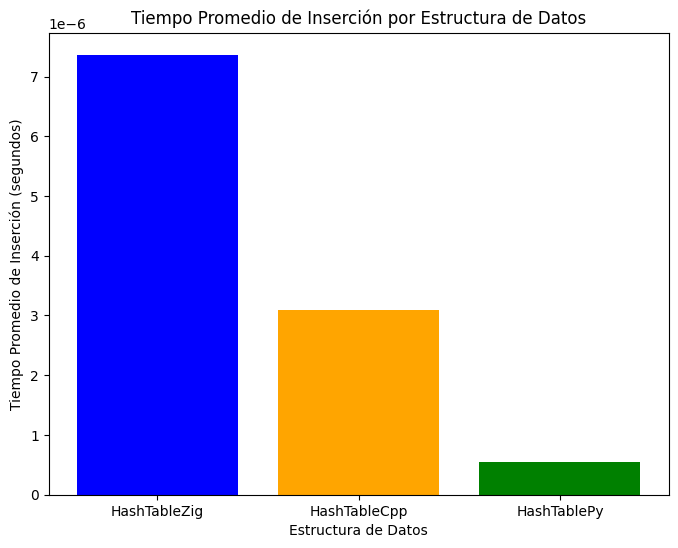

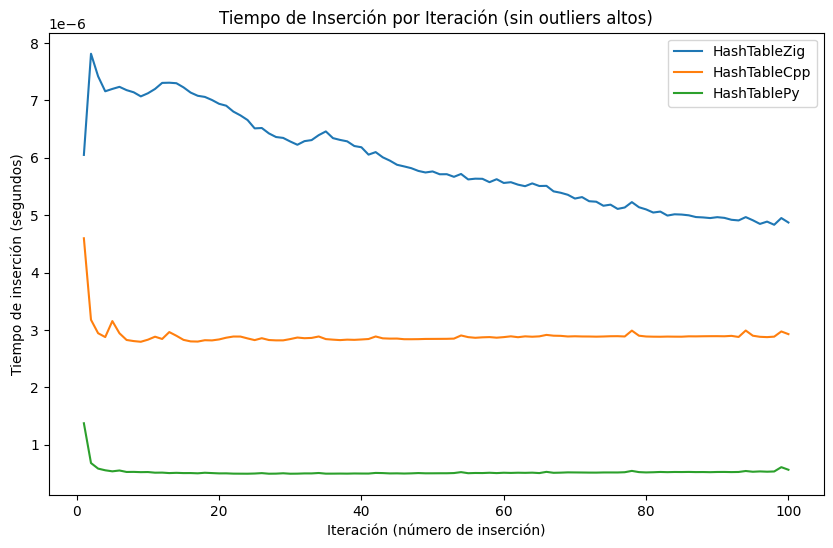

In [19]:
plt.figure(figsize=(8, 6))
plt.bar(avg_times.keys(), avg_times.values(), color=['blue', 'orange', 'green'])
plt.xlabel("Estructura de Datos")
plt.ylabel("Tiempo Promedio de Inserción (segundos)")
plt.title("Tiempo Promedio de Inserción por Estructura de Datos")
plt.show()

iteration_avg = {}
for name, experiment_results in final_results.items():
    experiment_array = np.array(experiment_results) 
    filtered_means = []
    for i in range(experiment_array.shape[1]):
        column = experiment_array[:, i]
        filtered_values = column[column <= 0.000012]
        filtered_mean = np.mean(filtered_values)
        filtered_means.append(filtered_mean)
    iteration_avg[name] = np.array(filtered_means)

plt.figure(figsize=(10, 6))
for name, avg in iteration_avg.items():
    plt.plot(range(1, count + 1), avg, label=name)
plt.xlabel("Iteración (número de inserción)")
plt.ylabel("Tiempo de inserción (segundos)")
plt.title("Tiempo de Inserción por Iteración (sin outliers altos)")
plt.legend()
plt.show()


En un numero de iteraciones pequeño podemos ver que python es el mas rapido, C++ es el segundo mas rapido y Zig es el mas lento aunque parece que esta disminuyendo sus tiempos segun itera.

Tambien cabe resaltar que como se aplico el multiprocessing en este taller respecto al anterior resulta mucho mas eficiente, y efectivamente se utilizan los recursos mas eficientemente, corriendo el programa el uso del procesador llega al 90% y de las ram tambien, de igual forma solo se estan usando 10 procesos, porque al usar mas resulta inestable y se sobrepasa los recursos disponibles por el computador.

In [9]:
experiments = 1000
count = 100000
structures = ["HashTableZig", "HashTableCpp", "HashTablePy"]
final_results = medir(structures, medir_insert, experiments, count)
avg_times = {}
for name, experiment_results in final_results.items():
    exp_promedios = [np.mean(times) for times in experiment_results]
    overall_avg = np.mean(exp_promedios)
    avg_times[name] = overall_avg

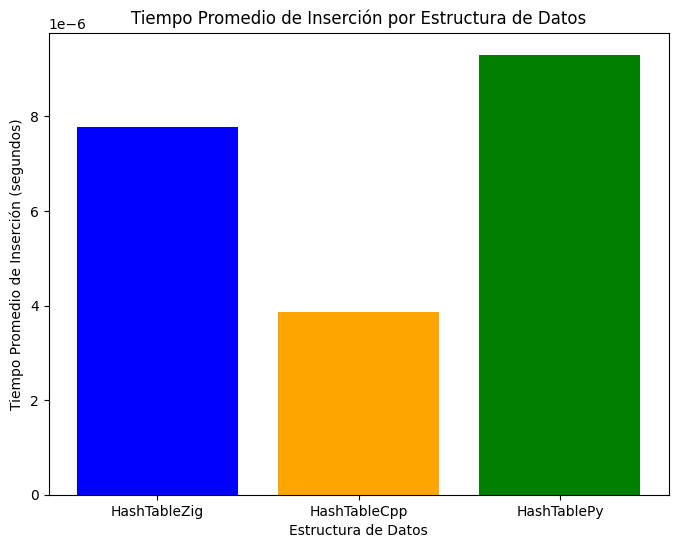

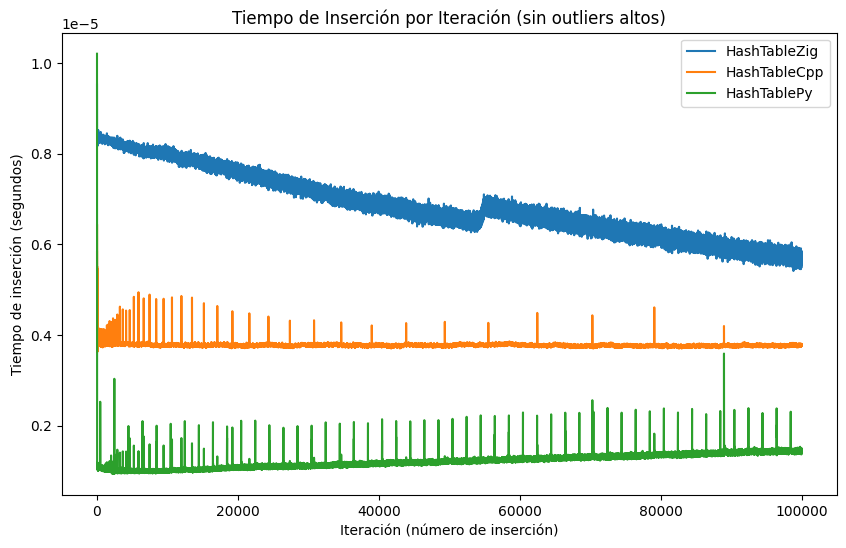

In [10]:
plt.figure(figsize=(8, 6))
plt.bar(avg_times.keys(), avg_times.values(), color=['blue', 'orange', 'green'])
plt.xlabel("Estructura de Datos")
plt.ylabel("Tiempo Promedio de Inserción (segundos)")
plt.title("Tiempo Promedio de Inserción por Estructura de Datos")
plt.show()

iteration_avg = {}
for name, experiment_results in final_results.items():
    experiment_array = np.array(experiment_results) 
    filtered_means = []
    for i in range(experiment_array.shape[1]):
        column = experiment_array[:, i]
        filtered_values = column[column <= 0.000012]
        filtered_mean = np.mean(filtered_values)
        filtered_means.append(filtered_mean)
    iteration_avg[name] = np.array(filtered_means)

plt.figure(figsize=(10, 6))
for name, avg in iteration_avg.items():
    plt.plot(range(1, count + 1), avg, label=name)
plt.xlabel("Iteración (número de inserción)")
plt.ylabel("Tiempo de inserción (segundos)")
plt.title("Tiempo de Inserción por Iteración (sin outliers altos)")
plt.legend()
plt.show()



Ahora, si realizamos el experimento con muchas repeticiones y un rango mayor de iteraciones, obtenemos resultados muy interesantes. Primero, vemos que la tabla hash en Zig sigue disminuyendo sus tiempos. Sin embargo, si continuamos aumentando la cantidad de iteraciones, los tiempos son muy largos o simplemente falta memoria RAM para terminar el proceso y este se cierra.

Viendo solo estos resultados, observamos que Python tiene los mayores tiempos, seguido de Zig y C++. Esta ventaja se debe a que estos lenguajes son más estables que Python, ya que este último, por alguna razón, presenta picos de tiempos muy altos. Estos picos no se muestran en la gráfica porque se están eliminando para no afectar la escala.

Otro aspecto a considerar es que no se está utilizando la misma función hash, y que al ejecutar las pruebas en Python, existe un tiempo adicional debido a la llamada de funciones de C++, como se mencionó en el primer informe. Esta es la razón por la que en pocas repeticiones y bajas iteraciones Python parece tener un mejor rendimiento. Sin embargo, estas pruebas demuestran que Python es menos consistente en sus tiempos de ejecución.

La diferencia de tiempos entre Zig y C++ se discutirá en la sección final.

En cuanto al tiempo de ejecución de la estructura, vemos que es lineal, como se esperaba.

###### Delete

In [9]:
experiments = 1000
count = 100000
structures = ["HashTableZig", "HashTableCpp", "HashTablePy"]
final_results = medir(structures, medir_remove, experiments, count)
avg_times = {}
for name, experiment_results in final_results.items():
    exp_promedios = [np.mean(times) for times in experiment_results]
    overall_avg = np.mean(exp_promedios)
    avg_times[name] = overall_avg

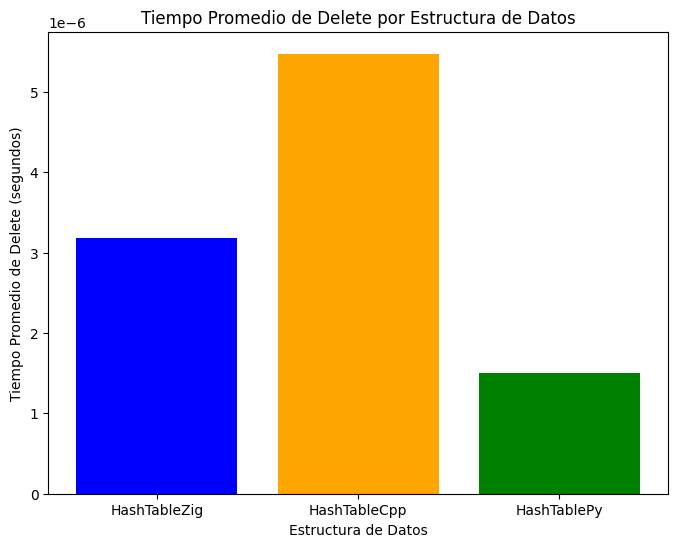

/home/jared/Documents/DataStructures/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jared/Documents/DataStructures/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


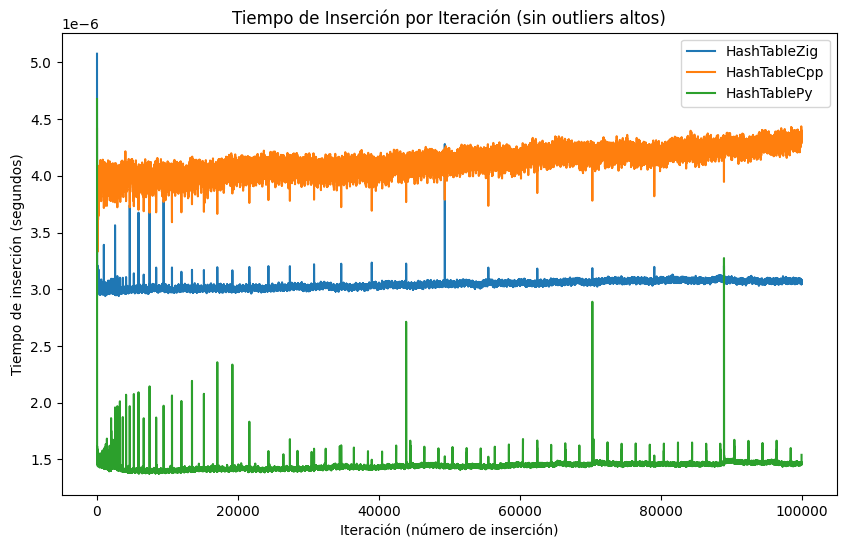

In [12]:
plt.figure(figsize=(8, 6))
plt.bar(avg_times.keys(), avg_times.values(), color=['blue', 'orange', 'green'])
plt.xlabel("Estructura de Datos")
plt.ylabel("Tiempo Promedio de Delete (segundos)")
plt.title("Tiempo Promedio de Delete por Estructura de Datos")
plt.show()

iteration_avg = {}
for name, experiment_results in final_results.items():
    experiment_array = np.array(experiment_results) 
    filtered_means = []
    for i in range(experiment_array.shape[1]):
        column = experiment_array[:, i]
        filtered_values = column[column <= 0.000006]
        filtered_mean = np.mean(filtered_values)
        filtered_means.append(filtered_mean)
    iteration_avg[name] = np.array(filtered_means)

plt.figure(figsize=(10, 6))
for name, avg in iteration_avg.items():
    plt.plot(range(1, count + 1), avg, label=name)
plt.xlabel("Iteración (número de inserción)")
plt.ylabel("Tiempo de inserción (segundos)")
plt.title("Tiempo de Inserción por Iteración (sin outliers altos)")
plt.legend()
plt.show()

En el delete podemos ver unos resultados interesantes, pues python parece ser mas estable que en el insert y C++ parce ser menos estable en sus promedio que Zig y Python pero esto debe ser mas por el algortimo que se esta usando, mas alla de otra cosa.

Respecto a los otros metodos en realidad como se menciono el update esta dentro del mismo insert asi mismo como el find, por lo que en realidad este analisis no aportaria nada. 

##### Conjuntos Disyuntos

In [ ]:
import time
import multiprocessing
import random
import matplotlib.pyplot as plt
import numpy as np

### Conclusiones

### Zig y C++

En este apartado discutiremos respecto a algunas caracteristicas espciales de Zig, y como se compara este con C++

#### Zig

Respecto a Zig este es un lenguaje de bajo nivel, es compilado, no tiene collector de basura y se compara con lenguajes como C, y en un menor grado con C++, 

Porejemplo este no cuenta con las abstracciones de un lenguaje orientado a objetos, lo que se hiso en este experimento fue una tipo, pues es lenguaje si permite que los struct tengan metodos propios, asi teniendose un comportamiento similar a una clase pero sin cosas como polimorfismos ko herencia.

Por otro lado Zig tambien tiene un manejo de memoria mas al detalle de que da C++, la muestra de esto es el memory allocator, la cual es una entidad que se encarga asignar y liberar memoria en el heap, recordemos en que espacios se pone la memoria al ejecutar un programa:

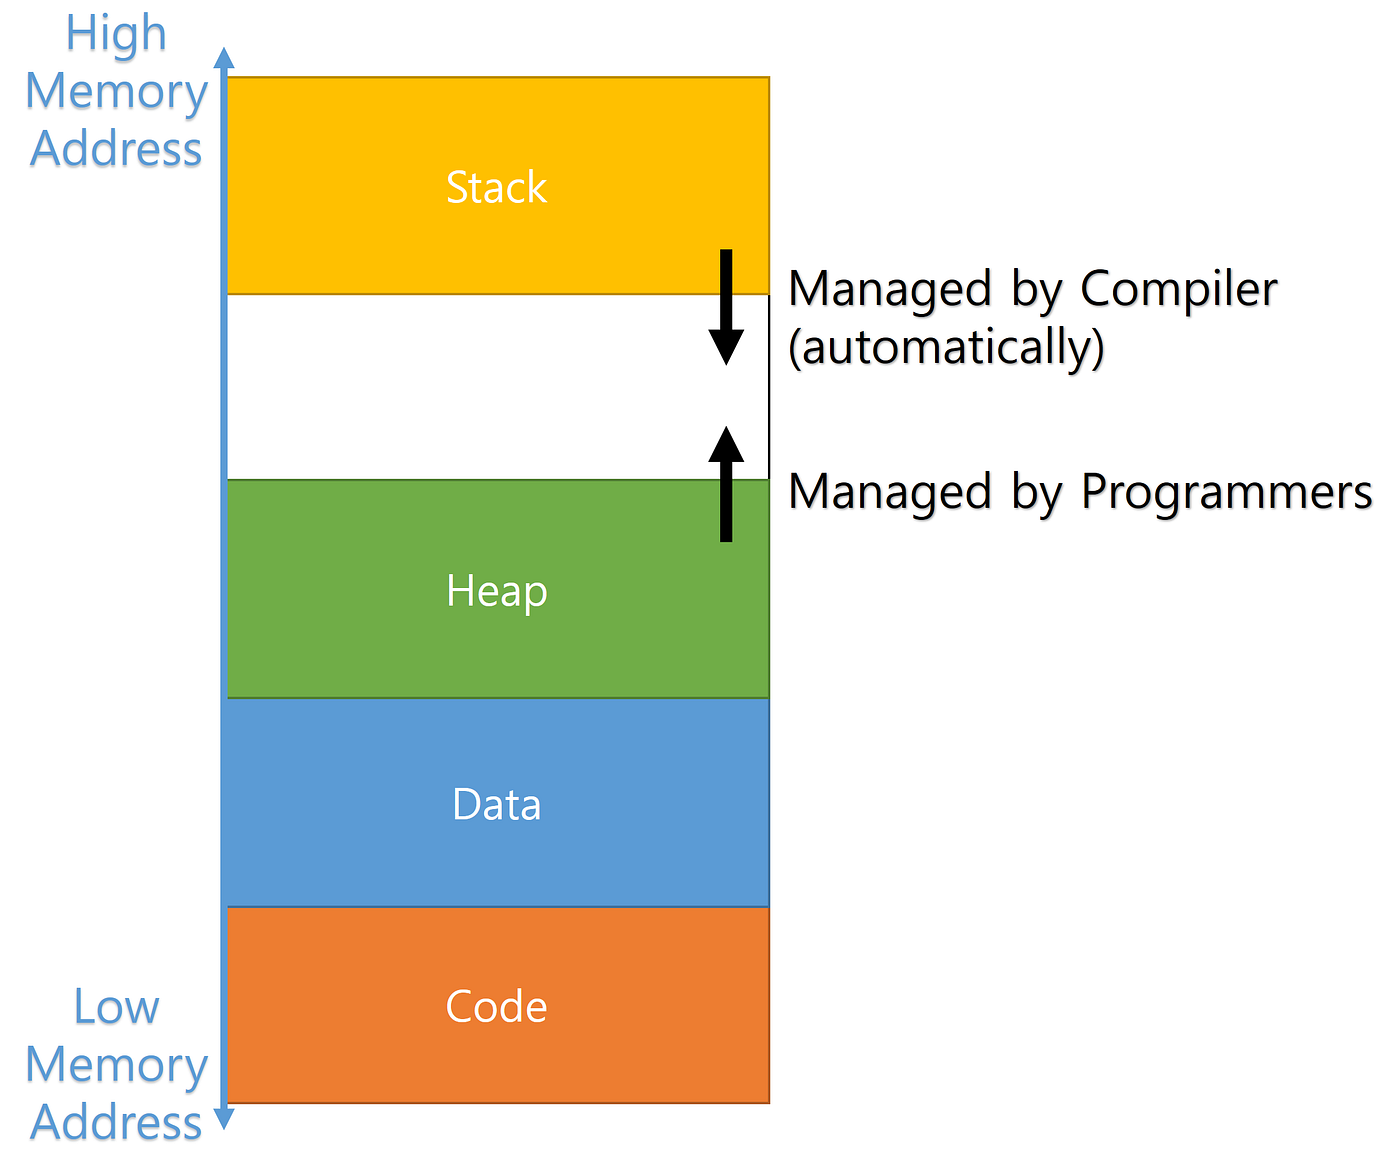

Esta suele ser manejada por el compilador como nos dice la imagen. Por defecto Zig trae varios alocadores de memoria en su libreria estandar:

1. **General Purpose Allocator (Asignador de Propósito General):** Este es el asignador predeterminado en Zig, adecuado para la mayoría de las aplicaciones. Proporciona una gestión equilibrada entre velocidad y eficiencia en el uso de la memoria.

2. **Arena Allocator (Asignador de Arena):** Este asignador es útil cuando se necesita asignar una gran cantidad de objetos de vida similar. Todas las asignaciones se liberan de una sola vez, lo que puede mejorar el rendimiento en escenarios específicos.

3. **Stack Allocator (Asignador de Pila):** Utiliza una estructura de pila para las asignaciones, permitiendo liberar memoria en orden inverso a su asignación. Es eficiente para patrones de uso LIFO (Last In, First Out).

4. **Fixed Buffer Allocator (Asignador de Buffer Fijo):** Este asignador opera sobre un bloque de memoria predefinido, útil en sistemas embebidos o situaciones donde se desea un control preciso sobre el uso de la memoria.

5. **Proxy Allocator (Asignador Proxy):** Envuelve otro asignador para agregar funcionalidades adicionales, como seguimiento de uso de memoria o depuración.

De igual forma uno puede definir sus propios memory allocators segun necesite.

#### C++ vs Zig

Antes de ir a esta comparacion es necesario hablar de como se hicieron las librerias de los mismos

##### Bindding

Un aspecto por el cual Zig resalta y ha tenido adopción es porque está pensado para ser altamente compatible con código de C ya existente. Para realizar el binding de Zig a Python, en realidad, primero se está haciendo un binding de Zig a C++, pues no existe una forma directa de hacer esto. El intérprete de Python que estamos utilizando, CPython, está pensado solo para hacer un binding entre C/C++ y Python. Pero, gracias a la compatibilidad entre Zig y C, solo es necesario compilar nuestro código de Zig e importarlo a C++ para usar PyBind11, por lo cual también es necesario crear una clase en C++ que va a usar nuestra estructura de Zig, y recién podremos importar esta clase.

Nuestro código de C++, para importarse, evidentemente, por lo antes dicho, usa PyBind11 y CMake para poder compilar nuestro código. Usamos G++ como nuestro compilador, además de que ahora estamos en un sistema Linux, por lo cual los archivos de nuestras librerías son .so.

#### Comparacion 

En realidad no tiene sentidos comparar lenguajes compilados, pues independientemente de que lenguaje utilizes deberias poder generar el mismo leguaje maquina, dicho esto, las diferencias de tiempo que tenemos simplemente se deben a que no tenemos codigo equivalentes. Las diferencias reales nacen de cuando un lenguaje es interpretado o tiene un colector de basura.

Otro aspecto a tener encunta es el compilador, pues el codigo de Zig se compila en LLVM, que es otro tipo de compiladores a lo que es Gcc, aunque de igual forma parte del codigo es compilado en este otro compilador, lo que tambien produce diferencias, en general LLVM deberia generar codigo mas optimizado, tambien podriamos compilar nuestro codigo de C++ con Clang que es un LLVM lo que haria la comparacion mas justa.